# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [21]:
#computing the proportion of people who survive in the control group
control_survival_proportion = df[df['transplant'] == 'control']['y'].mean()
print(f"proportion of suvivors control group: {control_survival_proportion:.4f}")

#computing the proportion of people who survive in the treatment group
treatment_survival_proportion = df[df['transplant'] == 'treatment']['y'].mean()
print(f"proportion of survivors treatment group: {treatment_survival_proportion:.4f}")

#difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (Average Treatment Effect)
average_treatment_effect = treatment_survival_proportion - control_survival_proportion
print(f"average treatment effect: {average_treatment_effect:.4f}")

proportion of suvivors control group: 0.1176
proportion of survivors treatment group: 0.3478
average treatment effect: 0.2302


In [22]:
import statsmodels.formula.api as smf

#regress y on transplant with a constant
model1 = smf.ols(formula='y ~ transplant', data=df).fit()

#print the model summary
print(model1.summary())

#the intercept is equal to the proportion of survivors in the control group, this is because in simple linear repression the intercept represents the mean of the dependent variable

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Tue, 07 Oct 2025   Prob (F-statistic):             0.0133
Time:                        02:16:55   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [23]:
import statsmodels.formula.api as smf

#regress y on a constant, transplant, and age
model2 = smf.ols(formula='y ~ transplant + age', data=df).fit()

#print the model summary
print(model2.summary())

#the intercept changes because i addded age to the model which makes the y axis zero years of age... so it is the estimated mean survival age for someone hypotehtically getting a transplant at the age of zero which is not necessarily useful except for prenatal heart transplants which I imagine are rare if included in this data at all.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000357
Time:                        02:16:56   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

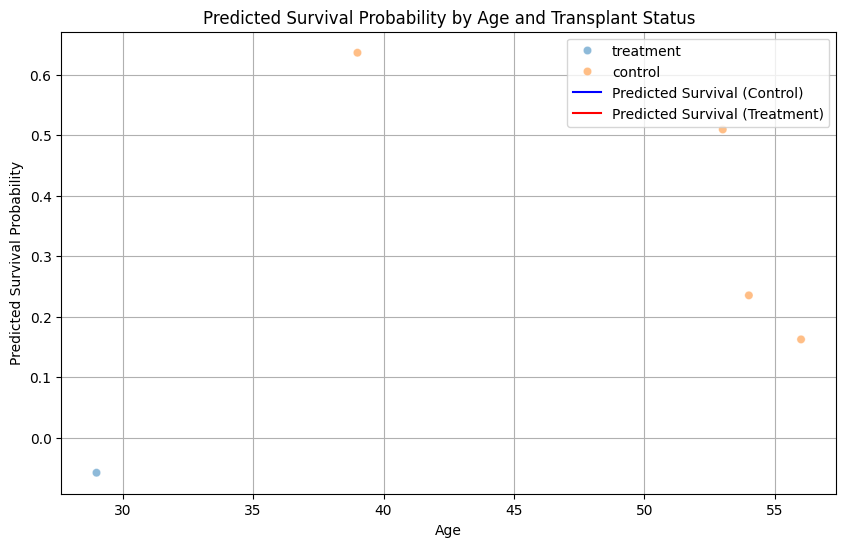

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#splitting the data into training and testing sets
X = df[['age', 'transplant']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#reset the indices of y_train and y_test to align with the new X DataFrames
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['age']])
X_test_poly = poly.transform(X_test[['age']])

#convert transplant to numerical and reshape for interaction
X_train_transplant = pd.get_dummies(X_train['transplant'], drop_first=True).values.reshape(-1, 1)
X_test_transplant = pd.get_dummies(X_test['transplant'], drop_first=True).values.reshape(-1, 1)


#combine polynomial features, transplant, and interactions
X_train_flexible_data = np.hstack((X_train_poly, X_train_transplant, X_train_poly * X_train_transplant))
X_test_flexible_data = np.hstack((X_test_poly, X_test_transplant, X_test_poly * X_test_transplant))

#create DataFrames with better column names
flexible_cols = [f'age_poly_{i}' for i in range(X_train_poly.shape[1])] + ['transplant_treatment'] + [f'age_poly_{i}_transplant' for i in range(X_train_poly.shape[1])]
X_train_flexible = pd.DataFrame(X_train_flexible_data, columns=flexible_cols)
X_test_flexible = pd.DataFrame(X_test_flexible_data, columns=flexible_cols)


#add a constant to the flexible features
X_train_flexible = sm.add_constant(X_train_flexible)
X_test_flexible = sm.add_constant(X_test_flexible)

#fit the linear regression model with flexible features
flexible_model = sm.OLS(y_train, X_train_flexible).fit()

#predict survival probabilities on the test set
y_pred_flexible = flexible_model.predict(X_test_flexible)

#create a DataFrame for plotting predicted values for a range of ages
plot_predictions_df = pd.DataFrame(columns=X_train_flexible.columns)
age_range = np.linspace(X_train['age'].min(), X_train['age'].max(), 100)

plot_predictions_df_control = pd.DataFrame(columns=X_train_flexible.columns)
plot_predictions_df_control['const'] = 1
plot_predictions_df_control['age_poly_0'] = age_range
plot_predictions_df_control['age_poly_1'] = age_range**2
plot_predictions_df_control['transplant_treatment'] = 0
plot_predictions_df_control['age_poly_0_transplant'] = 0
plot_predictions_df_control['age_poly_1_transplant'] = 0
#ensure column order matches training data
plot_predictions_df_control = plot_predictions_df_control[X_train_flexible.columns]


#populate the DataFrame for the treatment group
plot_predictions_df_treatment = pd.DataFrame(columns=X_train_flexible.columns)
plot_predictions_df_treatment['const'] = 1
plot_predictions_df_treatment['age_poly_0'] = age_range
plot_predictions_df_treatment['age_poly_1'] = age_range**2
plot_predictions_df_treatment['transplant_treatment'] = 1
plot_predictions_df_treatment['age_poly_0_transplant'] = age_range
plot_predictions_df_treatment['age_poly_1_transplant'] = age_range**2
#ensure column order matches training data
plot_predictions_df_treatment = plot_predictions_df_treatment[X_train_flexible.columns]


#predict survival probabilities for the plot
predicted_survival_control = flexible_model.predict(plot_predictions_df_control)
predicted_survival_treatment = flexible_model.predict(plot_predictions_df_treatment)


#plot the results
plt.figure(figsize=(10, 6))
#plot the actual test data points
plot_data = X_test.copy()
plot_data['predicted_survival'] = y_pred_flexible
sns.scatterplot(data=plot_data, x='age', y='predicted_survival', hue='transplant', alpha=0.5)

#plot the predicted survival curves
plt.plot(age_range, predicted_survival_control, color='blue', label='Predicted Survival (Control)')
plt.plot(age_range, predicted_survival_treatment, color='red', label='Predicted Survival (Treatment)')

plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age and Transplant Status')
plt.legend()
plt.grid(True)
plt.show()

#the predicted survival probability decreases with age for both groups! The predicted survival prob is higher for the treatment group pretty generally which suggests transplants are good. It also varies with age which suggests there is a non uniform treatment effect.

Using any predictive model in deciding how to appropriate donated organs to patients is difficult because there is a lack of explainability and frequently facotrs that are simply not able to accounted form within any dataset. For example, lifstyle choices should have an effect on candidacy greater that simple age, but it may not given how strong of a weight would have given this model. Also, this training data, depending on how far back it was sourced, could have inherent biases or be trained on specific demographics and therfore discrimiante if used by the CDC or UNOS or NIH. More complex models, while probably more accurate because they are including other points of valuable information may not have interpretability or explainability. The issue with predicitve models is even if they have a human in the loop, they are only as useful as a human in certain contexts because of this paradox of explainability. With other columns (other than age) a linear regression model might not be the most accurate at explaining causation above correlation. All regression models find correlation, but demonstrating causation is a more difficult process, and this model would not necessarily be able to establish that (e.g. diet as a survival predictor but not on years of life left, so a child with a typical picky childhood diet would be denied because an elderly patient has a better diet). Human oversight is the most critical aspect that would improve this model as there are significant risks involved with using onyl a model to make these types of suggestions.